In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import operator
import collections
import re

%matplotlib inline

In [2]:
#READING THE FILE

fname= 'Modelling-practices_Survey-answers_Cleaned.csv'
data_full= pd.read_csv(fname, sep=",", dtype=str) 
print (data_full.columns)
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None) 


Index(['Unnamed: 0', 'index', 'Informazioni cronologiche', 'Indirizzo email',
       'Partner', 'Short title of the work',
       'What was the objective of the modeling work?\r\nMultiple answers allowed',
       'What was the geographical scope of the work?',
       'Name the geographical territory \r\nIf not relevant, write “not relevant”',
       'Could the study be easily adapted to another geographical territory ?',
       'Is the modeling work applicable to other diseases?',
       'Pandemic period the study refers to\r\nMonth/year of beginning - month/year of end',
       'What data was used in the study?\r\nMultiple answers allowed',
       'For each of the data used in the study, how was this data available to you?\r\nMultiple answers allowed',
       'What data were missing that would have helped improve the study?\r\nMultiple answers allowed',
       'Why were the data missing?\r\nMultiple answers allowed',
       'Which of the following limitations applied to the data used 

   Pandemic period the study refers to\r\nMonth/year of beginning - month/year of end  \
0                                                                     2/2020 - 3/2020   
1                                                                     1/2020 - 2/2020   
2                                                                   02/2020 - 04/2020   
3                                                                   02/2020 - 03/2020   
4                                                                    01/2020 -02/2020   
5                                                                   01/2020 - 02/2020   
6                                                                   02/2020 - 07/2020   
7                                                                   02/2020 - 03/2020   
8                                                                   05/2020 - 11/2020   
9                                                                   02/2020 - 04/2020   
10                   

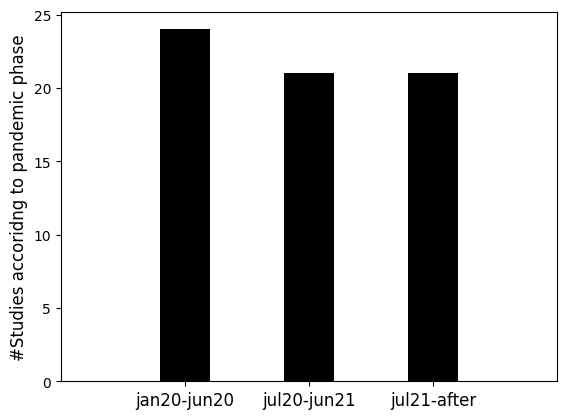

In [3]:
#DEFINING EPOCHS AND DISTRIBUTING STUDIES BASED ON EPOCHS

column='Pandemic period the study refers to\r\nMonth/year of beginning - month/year of end'

#assigning studies to epidemic phases based on the end date of the study period
#phase 0: before jun 2020
#phase 1: beteween jul 2020 and jun 2021
#phase 2: after jun 2021
def def_period(x):
    mend= re.findall(r"\w+", x)[2]
    yend= re.findall(r"\w+", x)[3]

    if (int(mend)<= 6) & (yend== '2020'):
        return 0
    elif ((int(mend)> 6) & (yend== '2020')) | ((int(mend)<= 6) & (yend== '2021')):
        return 1
    else:
        return 2
data_full['Period']=data_full[column].apply(lambda x: def_period(x))

print (data_full[[column,'Period']])

#plot number of studies per epidemic phase
epochs=['jan20-jun20','jul20-jun21','jul21-after']
y=[]
print ('#Studies according to pandemic phase')
for i in range(len(epochs)):
    a= len(data_full[data_full['Period']==i])
    print (epochs[i], a)
    y.append(a)
    
plt.bar(range(len(epochs)),y,width=0.4, color='black')
plt.xticks([0,1,2],epochs,fontsize=12)
plt.xlim(-1,3)
plt.ylabel("#Studies accoridng to pandemic phase", fontsize=12)
plt.savefig('epochs_repartition.png', format='png')

*****list of goals selected at least once
{'', 'understand the epidemic dynamics - Clinical aspects', 'evaluate impact npi - isolation/quarantine', 'evaluate impact npi - relaxation/exit strategies', 'understand the epidemic dynamics - determinants of geographical spread', 'anticipation - other', 'evaluate impact npi - social distancing', 'evaluate impact npi - contact tracing', 'understand the epidemic dynamics - emergence', 'vaccination', 'evaluate impact npi - screening', 'understand the epidemic dynamics - estimate transmission parameters', 'understand the epidemic dynamics - other', 'understand the epidemic dynamics - estimate true number of cases/under-reporting', 'anticipation - risk of geographical spread', 'Other', 'evaluate impact npi - school-based interventions', 'social/behavioural response to COVID-19 pandemic', 'evaluate impact npi - mask', 'evaluate impact npi - travel restrictions', 'anticipation - scenario analysis', 'evaluate impact npi - lockdown', 'understand the e

/var/folders/m6/b_ycfkhd48g__q0twsgsqb880000gn/T/ipykernel_6790/1285592356.py:109: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_yticklabels(['0', '8', '16', '24'],fontsize=12)


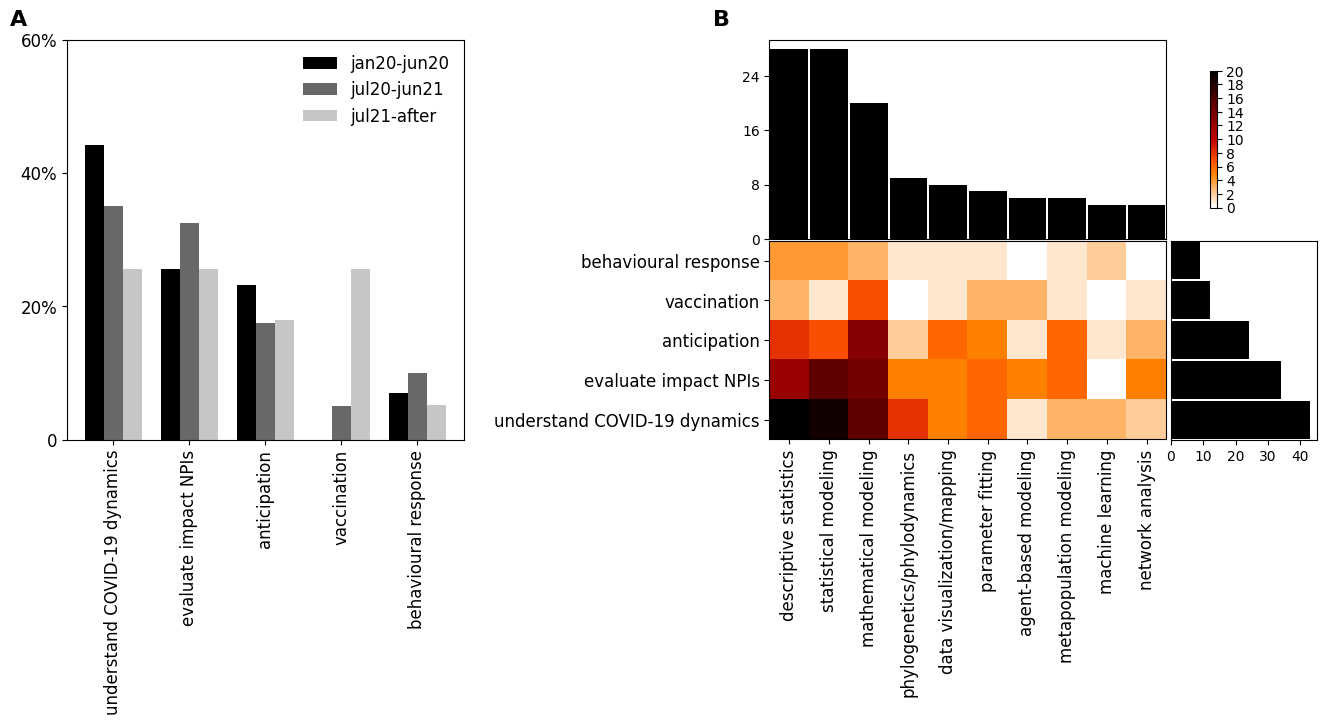


number of times and percentage of times each method was used for each epoch
descriptive statistics [10. 10.  8.] [42, 48, 38]
statistical modeling [10. 10.  8.] [42, 48, 38]
mathematical modeling [8. 7. 5.] [33, 33, 24]
phylogenetics/phylodynamics [3. 2. 4.] [12, 10, 19]
data visualization/mapping [3. 2. 3.] [12, 10, 14]
parameter fitting [2. 4. 1.] [8, 19, 5]
agent-based modeling [0. 2. 4.] [0, 10, 19]
metapopulation modeling [2. 2. 2.] [8, 10, 10]
machine learning [2. 2. 1.] [8, 10, 5]
network analysis [1. 1. 3.] [4, 5, 14]


In [4]:
#GOALS VS. METHODOLOGIES USED

column1="What was the objective of the modeling work?\r\nMultiple answers allowed"
column2="Modeling approach used\r\nMultiple answers allowed"

#GOAL: 

print ("*****list of goals selected at least once")
print (set([x.strip() for xs in list(data_full[column1].str.split(',')) for x in xs]))

#METHODS: 

print ("*****list of methods selected at least once")
print (set([x.strip() for xs in list(data_full[column2].str.split(',')) for x in xs]))

#STARTING ANALYSIS

data=data_full

# analysing frequency of  goals
print ("\nprinting frequency of goals")
for s in sorted(set([x.strip() for xs in list(data[column1].str.split(',')) for x in xs]).difference(['Other',''])):
    print (s, len(data[data[column1].str.contains(s)]))
print
    
#initialising broad cathegories of goals
goals_hist={}
for numero,s in enumerate(sorted(set([x.strip() for xs in list(data[column1].str.split(',')) for x in xs]).difference(['Other','']))): 
    a=s.split("-")[0].strip()
    goals_hist[a]=0
print ("goals broad cathergories analysed:\n", goals_hist.keys())

#define goal labels
goals_labels={
    'understand the epidemic dynamics':'understand COVID-19 dynamics',
    'anticipation':'anticipation',
    'evaluate impact npi':'evaluate impact NPIs', 
    'vaccination':'vaccination', 
    'social/behavioural response to COVID':'behavioural response'}

#initialising methods
methods_hist={}
for s in sorted(set([x.strip() for xs in list(data[column2].str.split(',')) for x in xs]).difference(['Other',''])): 
    methods_hist[s]=0
print ("methods analysed:\n", methods_hist.keys())

#filling histograms
hm= np.zeros((len(goals_hist.keys()),len(methods_hist.keys())))
for g in goals_hist:
    goals_hist[g]=len(data[data[column1].str.contains(g)])
print ("\nprinting goals broad cathergories histogram")
for g in goals_hist:
    print (g, goals_hist[g])
sorted_goals_hist = collections.OrderedDict(sorted(goals_hist.items(), key=operator.itemgetter(1), reverse=True))
for m in methods_hist:
    methods_hist[m]=len(data[data[column2].str.contains(m)])
print ("\nprinting method histogram")
for m in methods_hist:
    print (m, methods_hist[m])
sorted_methods_hist = collections.OrderedDict(sorted(methods_hist.items(), key=operator.itemgetter(1), reverse=True))
for i,g in enumerate(sorted_goals_hist):
    for j,m in enumerate(sorted_methods_hist):
        r=len(data[data[column1].str.contains(g) & data[column2].str.contains(m)])
        hm[i,j]= r
print ("\n2D histogram records")
print (hm)

#histogram of goals by epoch
def plot_hist(df, column, goals, ax, height, epochs, y):
    go_ep=[]
    for i,g in enumerate(goals):
        r=len(df[df[column].str.contains(g)])
        go_ep.append(r)
    norm= 0
    for i,g in enumerate(goals):
        norm+= go_ep[i]
    for i,g in enumerate(goals):
        go_ep[i]/= float(norm)
    x_coord=[x + (y+0.5)*height for x in range(len(goals))]    
    ax.bar(x_coord, go_ep, width=height, color=plt.cm.Greys_r(y/float(len(epochs))),label=epochs[y])
    
    return go_ep

#MAKING FIGURE

fig = plt.figure(figsize=(12.5, 4))

gs = GridSpec(2, 25)
ax1 = fig.add_subplot(gs[0, 14:22])
ax2 = fig.add_subplot(gs[1, 14:22])
ax3 = fig.add_subplot(gs[1, 22:])
ax4 = fig.add_subplot(gs[0, 22:23])
ax5 = fig.add_subplot(gs[0:, :8])
gs.update(wspace=0.1, hspace=0.01, left = 0., right = 1., bottom = 0., top = 1.) 

lgo= len(sorted_goals_hist)
lme= len(sorted_methods_hist)
hema= ax2.imshow(hm,cmap='gist_heat_r',origin='lower')
ax2.set_xticks(range(lme))
ax2.set_yticks(range(lgo))
ax2.set_xticklabels(sorted_methods_hist.keys(),rotation=90,fontsize=12)
ax2.set_yticklabels([goals_labels[g] for g in sorted_goals_hist],fontsize=12)

bins = np.arange(1, lme+1)
ax1.bar(bins,sorted_methods_hist.values(),width=0.95,color='black')
ax1.set_xlim(0.5,lme+0.5)
ax1.set_xticks([])
ax1.set_yticks(range(0,30,8))
ax5.set_yticklabels(['0', '8', '16', '24'],fontsize=12)
ax1.text(-0.1, 1.15, "B", transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

bins = np.arange(1, lgo+1)
ax3.barh(bins,sorted_goals_hist.values(),height=0.95,color='black')
ax3.set_ylim(0.5,lgo+0.5)
ax3.set_xticks([0,10,20,30,40])
ax3.set_yticks([])

ax4.axis('off')
cbar= fig.colorbar(hema, ax=ax4)
cbar.set_ticks(np.linspace(0,20,11))

print ("\nanalyzing and plotting the evolution of goals in time")
print (sorted_goals_hist.keys())
height = 0.25
epochs=['jan20-jun20','jul20-jun21','jul21-after']
for y in range(len(epochs)): 
    df= data[data['Period']==y]
    go_ep=plot_hist(df, column1, sorted_goals_hist.keys(), ax5, height, epochs, y)
    print ("distribution of studies among goals", epochs[y], ":", go_ep) 
plt.legend(frameon=False,fontsize=12)
ax5.set_xticks([x + 0.5*height*len(epochs) for x in range(lgo)])
ax5.set_xticklabels([goals_labels[g] for g in sorted_goals_hist],fontsize=12,rotation=90)
ax5.set_yticks([0, 0.2, 0.4, 0.6])
ax5.set_yticklabels(['0', '20%', '40%', '60%'],fontsize=12)
ax5.text(-0.1, 1.075, "A", transform=ax5.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plt.show()
#plt.savefig('COVID19-CS_methods-goals_final.png', format='png',bbox_inches='tight')
plt.close()

#Methods in time
me_ep= np.zeros((len(sorted_methods_hist),len(epochs)))
me_ep_norm= np.zeros((len(sorted_methods_hist),len(epochs)))
for y in range(len(epochs)): 
    df= data[data['Period']==y]
    norm= float(len(df))
    for j,m in enumerate(sorted_methods_hist):
        r=len(df[df[column2].str.contains(m)])
        me_ep[j,y]=r
        me_ep_norm[j,y]=r/norm
    
print ("\nnumber of times and percentage of times each method was used for each epoch")
for j,m in enumerate(sorted_methods_hist):
    print (m, me_ep[j,:], [round(record) for record in me_ep_norm[j,:]*100])

*****list of data used selected at least once
{'mobility data - change w.r.t the pre-pandemic period', "epidemiological data -  cases' line-list data", 'mobility data - pre-pandemic international mobility', 'epidemiological data -  incidence data', 'news data', 'attitude/behavioral surveys', 'mobility data - pre-pandemic domestic mobility', 'no data', 'pre-pandemic social contacts', 'media/microblogging', 'other', 'population characteristics', 'epidemiological data -  serological data', 'mobility data - real-time domestic mobility', 'epidemiological data -  genomic data', 'index of vulnerability and preparedness', 'real-time social contacts', 'intervention data', 'socio-economic indicators', 'mobility data - real-time international mobility', 'healthcare demographics', 'epidemiological data -  hospitalization', 'vaccination data', 'social structure'}
studies that used no data 1

data used aggregated in time:
attitude/behavioral surveys 7
epidemiological data -  cases' line-list data 32

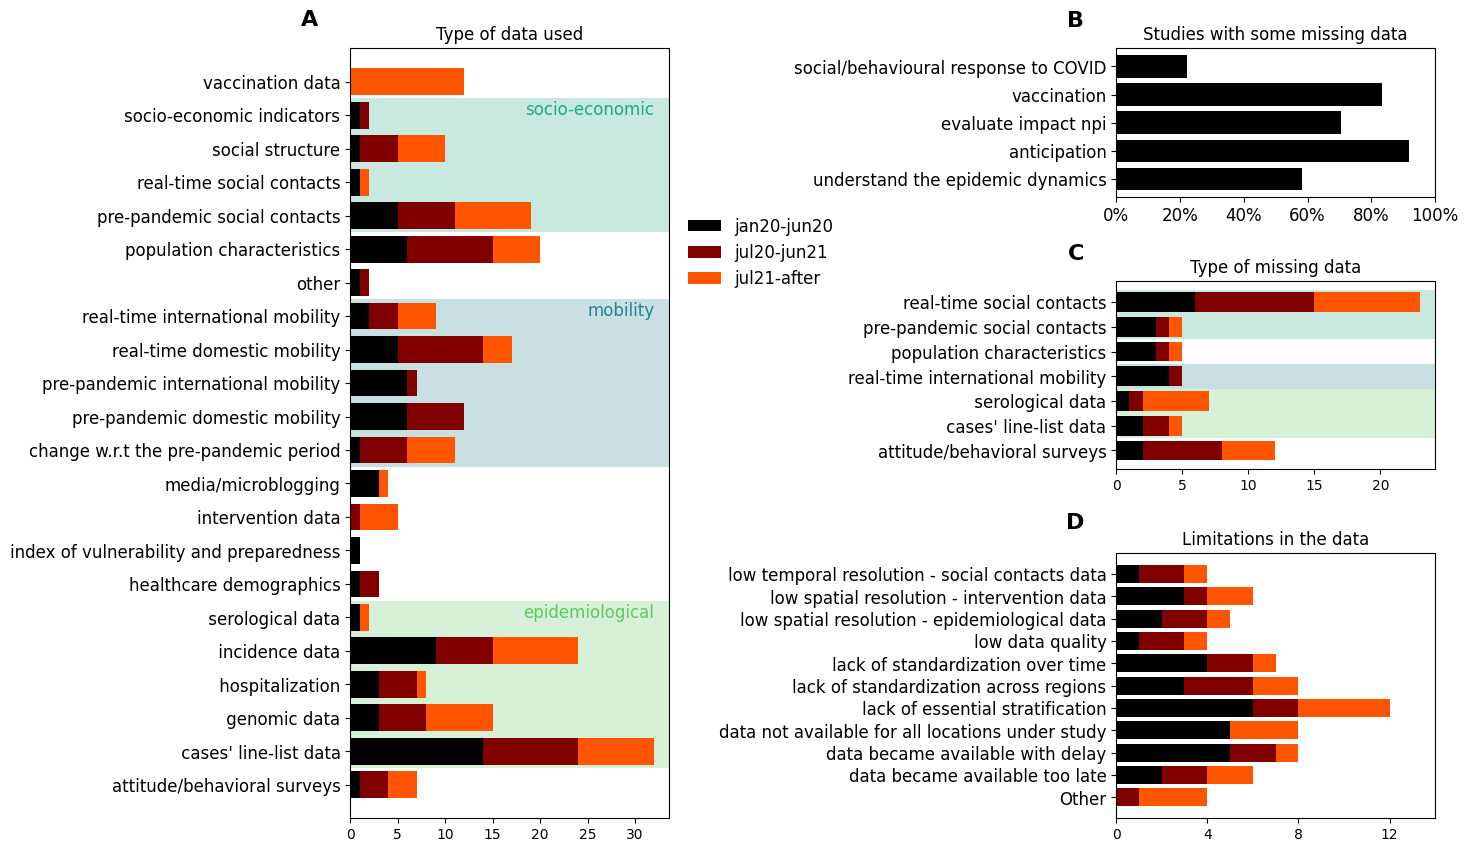

In [5]:
#DATA USE, NEEDS, LIMITATIONS

fig = plt.figure(figsize=(14, 10))
gs = GridSpec(20, 3)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0:4, 2])
ax3 = fig.add_subplot(gs[6:11, 2])
ax4 = fig.add_subplot(gs[13:, 2])

epochs=['jan20-jun20','jul20-jun21','jul21-after']
column_look='What was the objective of the modeling work?\r\nMultiple answers allowed'

###  -----DATA USED

column="What data was used in the study?\r\nMultiple answers allowed"

# data curation

data= data_full

#records to remove  
oth=['news data'] #this was added as a complement of media/microblogging, so it is redundant 

print ("*****list of data used selected at least once")
print (set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]))

#defining keys 
datau_keys=set([x.strip() for xs in list(data[column].str.split(',')) for x in xs])
datau_keys=datau_keys.difference(set(oth))
datau_keys=datau_keys.difference(['no data']) #removing "no data"
sorted_datau_keys=sorted(list(datau_keys))

print ("studies that used no data", len(data[data[column].str.contains('no data')]))

#histogram of data used

#categories' background color
ax1.axhspan(0.5, 5.5, facecolor=plt.cm.viridis(0.75), alpha=0.25)
ax1.text(32, 5., "epidemiological", fontsize = 12, horizontalalignment='right', color=plt.cm.viridis(0.75))
ax1.axhspan(9.5, 14.5, facecolor=plt.cm.viridis(0.45), alpha=0.25)
ax1.text(32, 14., "mobility", fontsize = 12, horizontalalignment='right', color=plt.cm.viridis(0.45))
ax1.axhspan(16.5, 20.5, facecolor=plt.cm.viridis(0.60), alpha=0.25)
ax1.text(32, 20., "socio-economic", fontsize = 12, horizontalalignment='right', color=plt.cm.viridis(0.60))
datau_labels=[]
for s in sorted_datau_keys:
    lls= s.strip().split(' - ')
    if len(lls)>1:
        datau_labels.append(lls[1])
    else:
        datau_labels.append(lls[0])

datau_previous=[]
for s in sorted_datau_keys: datau_previous.append(0)
for i in range(len(epochs)): 
    df= data[data['Period']==i]
    datau=[]
    for s in sorted_datau_keys: 
        datau.append(len(df[df[column].str.contains(s)]))
    bars = ax1.barh(range(len(sorted_datau_keys)), datau, left=datau_previous, 
                    color=plt.cm.gist_heat(float(i)/float(len(epochs))), label=epochs[i])
    for n,s in enumerate(sorted_datau_keys): datau_previous[n]+= datau[n]
ax1.set_title('Type of data used', fontsize=12)
ax1.set_ylim(-1,22)
ax1.set_yticks(range(len(sorted_datau_keys)))
ax1.set_yticklabels(datau_labels, fontsize=12)
ax1.legend(fontsize=12,frameon=False,bbox_to_anchor=(1.01, 0.8),loc='upper left')
ax1.text(-0.1, 1.05, "A", transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

print ("\ndata used aggregated in time:")
for n,s in enumerate(sorted_datau_keys):
    print (s, datau_previous[n])    
    
#In depth analysis of data used

#Distribution of goals for each of the three major epidemiological data used
print ("\nIn depth analysis of data used")
print ("\nDistribution of goals for each of the three major epidemiological data used")
all_goals=set([x.strip() for xs in list(data[column_look].str.split(',')) for x in xs])
for mdatak in ["epidemiological data -  cases' line-list data",
              'epidemiological data -  incidence data',
              'epidemiological data -  genomic data']:
    df= data[data[column].str.contains(mdatak)]
    print ("-- #studies with \"", mdatak, "\" used= ", len(df))
    for a in all_goals:
        print (a, len(df[df[column_look].str.contains(a)]), len(df[df[column_look].str.contains(a)])/float(len(df)))

#Data used (coarse classification) by epoch
print ("\nData used (coarse classification) by epoch")
datau_coarse=[]
for s in sorted_datau_keys:
    lls= s.strip().split(' - ')
    datau_coarse.append(lls[0])
print (set(datau_coarse))
for s in set(datau_coarse):
    print (s)
    for i in range(len(epochs)): 
        df= data[data['Period']==i] 
        print (epochs[i],len(df[df[column].str.contains(s)]))  

###  -----DATA MISSING
    
column="What data were missing that would have helped improve the study?\r\nMultiple answers allowed"

#records to remove  
oth=['']

data=data_full

print ("\n*****list of missing data selected at least once")
print (set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]))

#defining keys
mdata_keys=set([x.strip() for xs in list(data[column].str.split(',')) for x in xs])
mdata_keys=mdata_keys.difference(oth)
mdata_keys=mdata_keys.difference(['other']) #remove Other
mdata_keys=mdata_keys.difference(['no data were missing']) #remove no data were missing

sorted_mdata_keys=sorted(list(mdata_keys))

#histogram of missing data limited to the ones with count >= 5
#fraction of missing data by epoch

#categories' background color
ax3.axhspan(0.5, 2.5, facecolor=plt.cm.viridis(0.75), alpha=0.25)
ax3.axhspan(2.5, 3.5, facecolor=plt.cm.viridis(0.45), alpha=0.25)
ax3.axhspan(4.5, 6.5, facecolor=plt.cm.viridis(0.60), alpha=0.25)

#filtering keys - keeping the ones with at least 5 counting 
mdata_keys_ebc=[]
for s in sorted_mdata_keys: 
    if len(data[data[column].str.contains(s)])>=5:
        mdata_keys_ebc.append(s)
mdata_labels=[]
for s in mdata_keys_ebc:
    lls= s.strip().split(' - ')
    if len(lls)>1:
        mdata_labels.append(lls[1])
    else:
        mdata_labels.append(lls[0])

mdata_ebc_previous=[]
for s in mdata_keys_ebc: mdata_ebc_previous.append(0)
print ("\nmissing data by epoch")
for i in range(len(epochs)): 
    df= data[data['Period']==i]
    
    #histogram
    mdata=[]
    for s in mdata_keys_ebc: 
        count=len(df[df[column].str.contains(s)])
        mdata.append(count)
        print (epochs[i], s, count, "over", len(df), "ratio", float(count)/float(len(df)))
    bars = ax3.barh(range(len(mdata_keys_ebc)), mdata, left= mdata_ebc_previous, 
                    color=plt.cm.gist_heat(float(i)/float(len(epochs))))
    for n,s in enumerate(mdata_keys_ebc): mdata_ebc_previous[n]+=mdata[n]

    #missing data yes/no
    nnmd= len(df[df[column].str.contains('no data were missing')])
    fmd= 1-float(nnmd)/float(len(df))
    print (epochs[i], "studies w/ some missing data", len(df)-nnmd, "over", len(df), "ratio", fmd)
ax3.set_yticks(range(len(mdata_keys_ebc)))
ax3.set_yticklabels(mdata_labels, fontsize=12)
ax3.set_title('Type of missing data', fontsize=12)
ax3.text(-0.1, 1.2, "C", transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

print ("\nmissing data aggregated in time:")
for n,s in enumerate(mdata_keys_ebc):
    print (s, mdata_ebc_previous[n])    
    
#In depth analysis of missing data

print ("\nIn depth analysis of missing data")

mdatak= 'real-time social contacts'
df = data[data[column].str.contains(mdatak)]
print ("\n-- #studies with \"", mdatak, "\" missing= ", len(df))
for a in set(goals_labels.keys()):
    print (a, len(df[df[column_look].str.contains(a)]))
mdatak= 'attitude/behavioral surveys'
df = data[data[column].str.contains(mdatak)]
print ("-- #studies with \"", mdatak, "\" missing= ", len(df))
for a in set(goals_labels.keys()):
    print (a, len(df[df[column_look].str.contains(a)]))
print ("\n")

#Fraction of studies with missing data by goal

print ('-- fraction of studies with missing data by goal:')
y=[]
for a in goals_labels.keys():
    df= data[data[column_look].str.contains(a)]
    den= len(df)
    nnmd= len(df[df[column].str.contains('no data were missing')])
    fmd= 1-float(nnmd)/float(den)
    y.append(fmd)
    print (a, "studies w/ some missing data", den-nnmd, "over", den, "ratio", fmd)
print ("\n")
ax2.barh(goals_labels.keys(), y, color='black')    
ax2.set_title('Studies with some missing data', fontsize=12)
ax2.set_xlim(0,1)
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax2.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"], fontsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)
ax2.text(-0.1, 1.25, "B", transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

#no data missing output
print ("numb. of studies with no missing data overall", len(data[data[column].str.contains('no data were missing')]))
print ("fraction of studies with no missing data overall", float(len(data[data[column].str.contains('no data were missing')]))/float(len(data)))
print ("fraction of studies with missing data overall", 1-float(len(data[data[column].str.contains('no data were missing')]))/float(len(data)))
    
###  -----LIMITATIONS IN THE DATA
    
column="Which of the following limitations applied to the data used in the study?\r\nMultiple answers allowed"

data= data_full

#records to remove  
oth=['']

#print (set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]))

issue_keys=set([x.strip() for xs in list(data[column].str.split(',')) for x in xs])
issue_keys=issue_keys.difference(oth)
issue_keys=issue_keys.difference(['other']) #remove Other
issue_keys=issue_keys.difference(['no limitations']) #remove missing data

#studies with no limitation in the data
print ("\nnumber and fraction of studies with no limitations in the data")
print (len(data[data[column]=='no limitations']), float(len(data[data[column]=='no limitations']))/float(len(data)))
print ("\nnumber and fraction of studies with some limitations in the data")
print (len(data)-len(data[data[column]=='no limitations']), 1-float(len(data[data[column]=='no limitations']))/float(len(data)))

#filtering keys - keeping the ones with at least 4 counting 
idt={}
for s in issue_keys: idt[s]= 0
for s in [x.strip() for xs in list(data[column].str.split(',')) for x in xs]: 
    if s in issue_keys:
        idt[s]+=1

to_del_issue_keys=[]
issue_keys_ebc= []
for s in issue_keys:
    if idt[s]>=4: #select the kind of issues for which have at least 4 counting
        issue_keys_ebc.append(s)
issue_keys_ebc=sorted(issue_keys_ebc) #barh does not like sets

issue_ebc_previous=[]
for s in issue_keys_ebc: issue_ebc_previous.append(0)
for i in range(len(epochs)): 
    df= data[data['Period']==i]
    
    #kind of data limitations by epoch
    issue=[]
    for s in issue_keys_ebc: 
        issue.append(len(df[df[column].str.contains(s)]))
    bars = ax4.barh(issue_keys_ebc, issue, left= issue_ebc_previous, 
                    color=plt.cm.gist_heat(float(i)/float(len(epochs))))
    for n,s in enumerate(issue_keys_ebc): issue_ebc_previous[n]+=issue[n]
ax4.set_title('Limitations in the data', fontsize=12)
ax4.set_xlim(0,14)
ax4.set_xticks([0,4,8,12])
ax4.tick_params(axis='y', which='major', labelsize=12)
ax4.text(-0.1, 1.15, "D", transform=ax4.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plt.show()
#plt.savefig('COVID19-CS_data-nodata_final.png', format='png',bbox_inches='tight')
plt.close()




AWARENESS
casted answers
{'yes', 'no', 'Other'}
number/fraction of studies that supported understanding and awareness 58 0.8787878787878788

Goal: is the ratio statistically different from the complementary sample? record, table, ratio, p-values:
understand the epidemic dynamics [[37, 6], [21, 2]] SignificanceResult(statistic=np.float64(0.5873015873015873), pvalue=np.float64(0.8457121950442228))
anticipation [[24, 0], [34, 8]] SignificanceResult(statistic=inf, pvalue=np.float64(0.02054996133660458))
evaluate impact npi [[34, 0], [24, 8]] SignificanceResult(statistic=inf, pvalue=np.float64(0.0018313167799136121))
vaccination [[12, 0], [46, 8]] SignificanceResult(statistic=inf, pvalue=np.float64(0.1811530817863222))
social/behavioural response to COVID [[8, 1], [50, 7]] SignificanceResult(statistic=np.float64(1.12), pvalue=np.float64(0.7019819573537451))

Missing data: is the ratio statistically different from the complementary sample? record, table, ratio, p-values:
attitude/behaviora

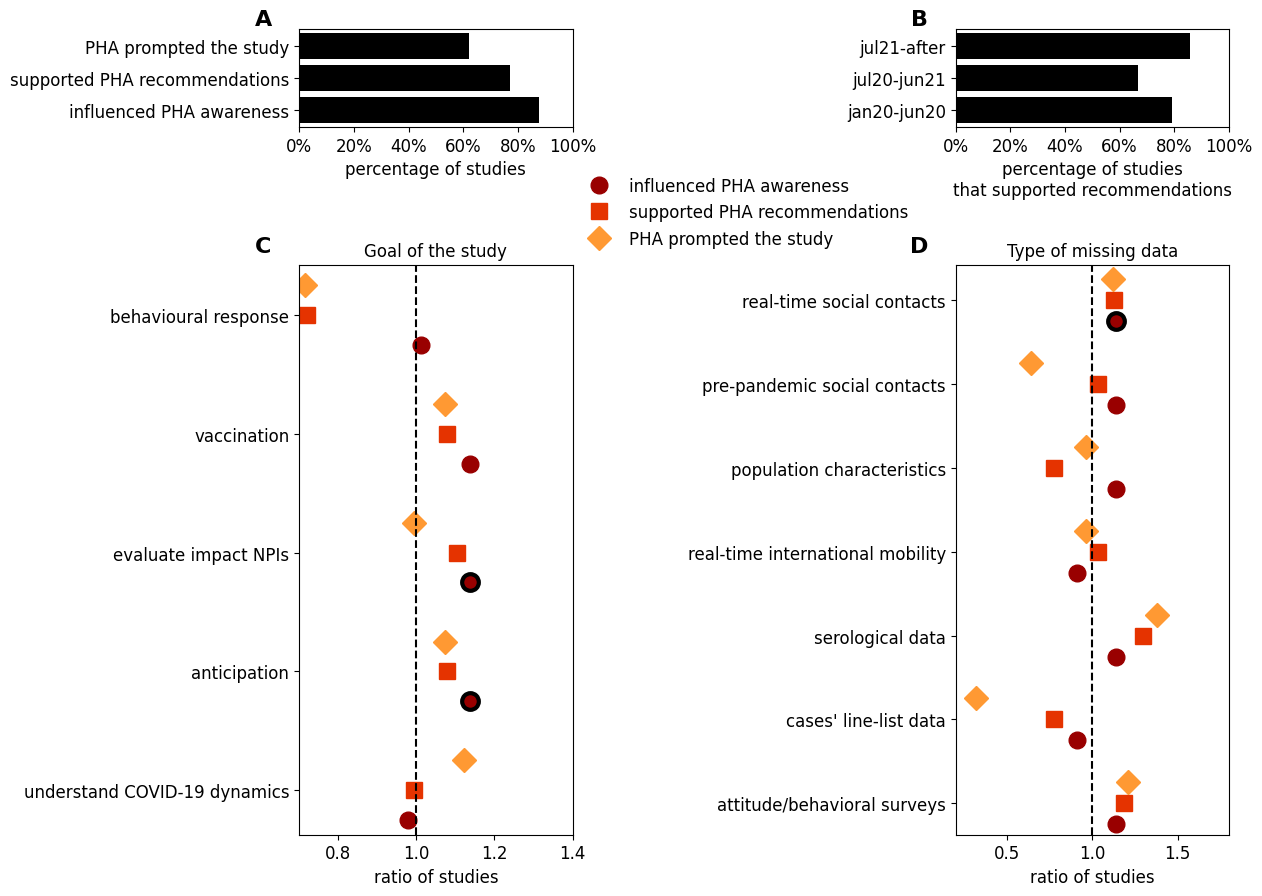

In [ ]:
#INTERACTIONS WITH PUBLIC HEALTH AUTHORITIES

fig = plt.figure(figsize=(12, 12))
gs = GridSpec(8, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[2:7, 0])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[2:7, 2])

DATAL= len(data)

goal_Iwant=['understand the epidemic dynamics','anticipation','evaluate impact npi', 
            'vaccination', 'social/behavioural response to COVID']
column_goal='What was the objective of the modeling work?\r\nMultiple answers allowed'
goal_count={} #ratio of studies with goal g among all studies
goal_count_int={} #number of studies with goal g among all studies
for g in goal_Iwant: 
    goal_count_int[g]= len(data[data[column_goal].str.contains(g)])
    goal_count[g]= goal_count_int[g]/float(DATAL)

nmdata= 'no data were missing'
column_mdata="What data were missing that would have helped improve the study?\r\nMultiple answers allowed"
mdata_count={} #ratio of studies with missing data m among all studies
mdata_count_int={} #counting of studies with missing data m among all studies
for m in mdata_keys_ebc:
    mdata_count_int[m]=len(data[data[column_mdata].str.contains(m)])
    mdata_count[m]= float(mdata_count_int[m])/float(DATAL)

y= [] #ratio of studies with the given kind of interaction
string=[] #label for the kind of interaction
y_mdata= [] #ratio of studies with missing data (any kind) for the given kind of interaction

###  -----AWARENESS

column="Did the presented modeling influence the scientific understanding for situational \r\nawareness of public-health authorities/decision-makers?"
label_interaction= 'influenced PHA awareness'
string.append(label_interaction)
symb= "o"
co= 0.4
offset= 0.125
print ("\n")
print ("AWARENESS")

data= data_full
print( "casted answers")
print (set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]))

#-- ratio of YES
df= data[data[column]=='yes']
dfno= data[data[column]!='yes']
den= len(df)
denno= len(dfno)
ratio= den/float(DATAL)
y.append(ratio)
print ("number/fraction of studies that supported understanding and awareness", den, ratio)

#-- goals of these studies
print ("\nGoal: is the ratio statistically different from the complementary sample? record, table, ratio, p-values:")
goal_count_yes={} #ratio of studies with goal g among those with PHA interaction YES
goal_ratio=[] #ratio of studies with goal g among those with PHA interaction YES vs. ratio of studies with goal g among all studies
significant_ylocal=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
significant_goal_ratio=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
n_tests= len(goal_Iwant)*3 #number of null hypothesis tests done for correcting for multiple testing
for i,g in enumerate(goal_Iwant): 
    num= len(df[df[column_goal].str.contains(g)]) #number of studies with goal g among those with PHA interaction YES
    numno= len(dfno[dfno[column_goal].str.contains(g)]) #number of studies with goal g among those with PHA interaction NOT YES
    goal_count_yes[g]= float(num)/float(den) #ratio of studies with goal g among those with PHA interaction YES
    ratio_ratio= goal_count_yes[g]/goal_count[g] #ratio of studies with goal g among those with PHA interaction YES vs. ratio of studies with goal g among all studies
    goal_ratio.append(ratio_ratio)
    table= [[num,numno],[den-num,denno-numno]] #table for Fisher exact test
    #recording cases for which the ratio is significantly different from one according to the Fisher exact test
    if scipy.stats.fisher_exact(table, alternative='two-sided')[1]*n_tests<0.05: 
        significant_ylocal.append(i+offset)
        significant_goal_ratio.append(ratio_ratio)
    print (g, table, ratio_ratio, scipy.stats.fisher_exact(table, alternative='two-sided'))

ylocal=[x + offset for x in range(len(goal_Iwant))]
#plotting ratio of ratios
ax2.plot(goal_ratio, ylocal,  marker=symb, markersize= 12,
         color=plt.cm.gist_heat(co), linestyle='None', label=label_interaction)
#highlighting points that are statistically significant
ax2.plot(significant_goal_ratio, significant_ylocal,  marker=symb, markersize= 12,
         markerfacecolor='none', markeredgecolor='black', markeredgewidth=3, linestyle='None')
   
#-- missing data (any kind of data) among these studies
num= den-len(df[df[column_mdata]==nmdata])
ratio= float(num)/float(den)
y_mdata.append(ratio)

#-- missing data of these studies
print ("\nMissing data: is the ratio statistically different from the complementary sample? record, table, ratio, p-values:")
mdata_count_yes={} #ratio of studies with missing data m among those with PHA interaction YES
mdata_ratio=[] #ratio of studies with missing data m among those with PHA interaction YES vs. ratio of studies with missing data m among all studies
significant_ylocal=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
significant_mdata_ratio=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
n_tests= len(mdata_keys_ebc)*3 #number of null hypothesis tests done for correcting for multiple testing
for i,m in enumerate(mdata_keys_ebc): 
    num= len(df[df[column_mdata].str.contains(m)]) #number of studies with missing data m among those with PHA interaction YES
    numno= len(dfno[dfno[column_mdata].str.contains(m)]) #number of studies with missing data m among those with PHA interaction NOT YES
    mdata_count_yes[m]=float(num)/float(den) #ratio of studies with missing data m among those with PHA interaction YES
    ratio_ratio= mdata_count_yes[m]/mdata_count[m] #ratio of studies with missing data m among those with PHA interaction YES vs. ratio of studies with missing data m among all studies
    mdata_ratio.append(ratio_ratio)
    table= [[num,numno],[den-num,denno-numno]] #table for Fisher exact test
    #recording cases for which the ratio is significantly different from one according to the Fisher exact test
    if scipy.stats.fisher_exact(table, alternative='two-sided')[1]*n_tests<0.05:
        significant_ylocal.append(i+offset)
        significant_mdata_ratio.append(ratio_ratio)
    print (m, table, scipy.stats.fisher_exact(table, alternative='two-sided'))
    
ylocal=[x + offset for x in range(len(mdata_keys_ebc))]
#plotting ratio of ratios
ax4.plot(mdata_ratio, ylocal,  marker=symb, markersize= 12, 
         color=plt.cm.gist_heat(co), linestyle='None', label=label_interaction)
#highlighting points that are statistically significant
ax4.plot(significant_mdata_ratio, significant_ylocal,  marker=symb, markersize= 12,
         markerfacecolor='none', markeredgecolor='black', markeredgewidth=3, linestyle='None')

###  -----RECOMMENDATIONS

column="Did the study support official recommendations by public-health authorities/decision makers? "
label_interaction= 'supported PHA recommendations'
string.append(label_interaction)
symb= "s"
co= 0.6
offset= 0.375
print ("\n")
print ("RECOMMENDATIONS")

data= data_full
print ("casted answers")
print (set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]))

#-- ratio of YES
df= data[data[column]=='yes']
dfno= data[data[column]!='yes']
den= len(df)
denno= len(dfno)
ratio= den/float(DATAL)
y.append(ratio)
print ("number/fraction of studies that supported understanding and awareness", den, ratio)

#-- goals of these studies
print ("\nGoal: is the ratio statistically different from the complementary sample? record, table, ratio, p-values:")
goal_count_yes={} #ratio of studies with goal g among those with PHA interaction YES
goal_ratio=[] #ratio of studies with goal g among those with PHA interaction YES vs. ratio of studies with goal g among all studies
significant_ylocal=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
significant_goal_ratio=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
n_tests= len(goal_Iwant)*3 #number of null hypothesis tests done for correcting for multiple testing
for i,g in enumerate(goal_Iwant): 
    num= len(df[df[column_goal].str.contains(g)]) #number of studies with goal g among those with PHA interaction YES
    numno= len(dfno[dfno[column_goal].str.contains(g)]) #number of studies with goal g among those with PHA interaction NOT YES
    goal_count_yes[g]= float(num)/float(den) #ratio of studies with goal g among those with PHA interaction YES
    ratio_ratio= goal_count_yes[g]/goal_count[g] #ratio of studies with goal g among those with PHA interaction YES vs. ratio of studies with goal g among all studies
    goal_ratio.append(ratio_ratio)
    table= [[num,numno],[den-num,denno-numno]] #table for Fisher exact test
    #recording cases for which the ratio is significantly different from one according to the Fisher exact test
    if scipy.stats.fisher_exact(table, alternative='two-sided')[1]*n_tests<0.05: 
        significant_ylocal.append(i+offset)
        significant_goal_ratio.append(ratio_ratio)
    print (g, table, scipy.stats.fisher_exact(table, alternative='two-sided'))

ylocal=[x + offset for x in range(len(goal_Iwant))]
#plotting ratio of ratios
ax2.plot(goal_ratio, ylocal,  marker=symb, markersize= 12,
         color=plt.cm.gist_heat(co), linestyle='None', label=label_interaction)
#highlighting points that are statistically significant
ax2.plot(significant_goal_ratio, significant_ylocal,  marker=symb, markersize= 12,
         markerfacecolor='none', markeredgecolor='black', markeredgewidth=3, linestyle='None')
   
#-- missing data (any kind of data) among these studies
num= den-len(df[df[column_mdata]==nmdata])
ratio= float(num)/float(den)
y_mdata.append(ratio)

#-- missing data of these studies
print ("\nMissing data: is the ratio statistically different from the complementary sample? record, table, ratio, p-values:")
mdata_count_yes={} #ratio of studies with missing data m among those with PHA interaction YES
mdata_ratio=[] #ratio of studies with missing data m among those with PHA interaction YES vs. ratio of studies with missing data m among all studies
significant_ylocal=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
significant_mdata_ratio=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
n_tests= len(mdata_keys_ebc)*3 #number of null hypothesis tests done for correcting for multiple testing
for i,m in enumerate(mdata_keys_ebc): 
    num= len(df[df[column_mdata].str.contains(m)]) #number of studies with missing data m among those with PHA interaction YES
    numno= len(dfno[dfno[column_mdata].str.contains(m)]) #number of studies with missing data m among those with PHA interaction NOT YES
    mdata_count_yes[m]=float(num)/float(den) #ratio of studies with missing data m among those with PHA interaction YES
    ratio_ratio= mdata_count_yes[m]/mdata_count[m] #ratio of studies with missing data m among those with PHA interaction YES vs. ratio of studies with missing data m among all studies
    mdata_ratio.append(ratio_ratio)
    table= [[num,numno],[den-num,denno-numno]] #table for Fisher exact test
    #recording cases for which the ratio is significantly different from one according to the Fisher exact test
    if scipy.stats.fisher_exact(table, alternative='two-sided')[1]*n_tests<0.05:
        significant_ylocal.append(i+offset)
        significant_mdata_ratio.append(ratio_ratio)
    print (m, table, scipy.stats.fisher_exact(table, alternative='two-sided'))
    
ylocal=[x + offset for x in range(len(mdata_keys_ebc))]
#plotting ratio of ratios
ax4.plot(mdata_ratio, ylocal,  marker=symb, markersize= 12, 
         color=plt.cm.gist_heat(co), linestyle='None', label=label_interaction)
#highlighting points that are statistically significant
ax4.plot(significant_mdata_ratio, significant_ylocal,  marker=symb, markersize= 12,
         markerfacecolor='none', markeredgecolor='black', markeredgewidth=3, linestyle='None')

###  -----PROMPTED THE STUDY

column="Was the study prompted by discussion with Public health authorities/decision makers?"
label_interaction= 'PHA prompted the study'
string.append(label_interaction)
symb= "D"
co= 0.8
offset= 0.625
print ("\n")
print ("PROMPTED")

data= data_full
print ("casted answers")
print (set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]))

#-- ratio of YES
df= data[data[column]=='yes']
dfno= data[data[column]!='yes']
den= len(df)
denno= len(dfno)
ratio= den/float(DATAL)
y.append(ratio)
print ("number/fraction of studies that supported understanding and awareness", den, ratio)

#-- goals of these studies
print ("\nGoal: is the ratio statistically different from the complementary sample? record, table, ratio, p-values:")
goal_count_yes={} #ratio of studies with goal g among those with PHA interaction YES
goal_ratio=[] #ratio of studies with goal g among those with PHA interaction YES vs. ratio of studies with goal g among all studies
significant_ylocal=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
significant_goal_ratio=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
n_tests= len(goal_Iwant)*3 #number of null hypothesis tests done for correcting for multiple testing
for i,g in enumerate(goal_Iwant): 
    num= len(df[df[column_goal].str.contains(g)]) #number of studies with goal g among those with PHA interaction YES
    numno= len(dfno[dfno[column_goal].str.contains(g)]) #number of studies with goal g among those with PHA interaction NOT YES
    goal_count_yes[g]= float(num)/float(den) #ratio of studies with goal g among those with PHA interaction YES
    ratio_ratio= goal_count_yes[g]/goal_count[g] #ratio of studies with goal g among those with PHA interaction YES vs. ratio of studies with goal g among all studies
    goal_ratio.append(ratio_ratio)
    table= [[num,numno],[den-num,denno-numno]] #table for Fisher exact test
    #recording cases for which the ratio is significantly different from one according to the Fisher exact test
    if scipy.stats.fisher_exact(table, alternative='two-sided')[1]*n_tests<0.05: 
        significant_ylocal.append(i+offset)
        significant_goal_ratio.append(ratio_ratio)
    print (g, table, scipy.stats.fisher_exact(table, alternative='two-sided'))

ylocal=[x + offset for x in range(len(goal_Iwant))]
#plotting ratio of ratios
ax2.plot(goal_ratio, ylocal,  marker=symb, markersize= 12,
         color=plt.cm.gist_heat(co), linestyle='None', label=label_interaction)
#highlighting points that are statistically significant
ax2.plot(significant_goal_ratio, significant_ylocal,  marker=symb, markersize= 12,
         markerfacecolor='none', markeredgecolor='black', markeredgewidth=3, linestyle='None')
   
#-- missing data (any kind of data) among these studies
num= den-len(df[df[column_mdata]==nmdata])
ratio= float(num)/float(den)
y_mdata.append(ratio)

#-- missing data of these studies
print ("\nMissing data: is the ratio statistically different from the complementary sample? record, table, ratio, p-values:")
mdata_count_yes={} #ratio of studies with missing data m among those with PHA interaction YES
mdata_ratio=[] #ratio of studies with missing data m among those with PHA interaction YES vs. ratio of studies with missing data m among all studies
significant_ylocal=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
significant_mdata_ratio=[] #recording cases for which the ratio is significantly different from one according to the Fisher exact test
n_tests= len(mdata_keys_ebc)*3 #number of null hypothesis tests done for correcting for multiple testing
for i,m in enumerate(mdata_keys_ebc): 
    num= len(df[df[column_mdata].str.contains(m)]) #number of studies with missing data m among those with PHA interaction YES
    numno= len(dfno[dfno[column_mdata].str.contains(m)]) #number of studies with missing data m among those with PHA interaction NOT YES
    mdata_count_yes[m]=float(num)/float(den) #ratio of studies with missing data m among those with PHA interaction YES
    ratio_ratio= mdata_count_yes[m]/mdata_count[m] #ratio of studies with missing data m among those with PHA interaction YES vs. ratio of studies with missing data m among all studies
    mdata_ratio.append(ratio_ratio)
    table= [[num,numno],[den-num,denno-numno]] #table for Fisher exact test
    #recording cases for which the ratio is significantly different from one according to the Fisher exact test
    if scipy.stats.fisher_exact(table, alternative='two-sided')[1]*n_tests<0.05:
        significant_ylocal.append(i+offset)
        significant_mdata_ratio.append(ratio_ratio)
    print (m, table, scipy.stats.fisher_exact(table, alternative='two-sided'))
    
ylocal=[x + offset for x in range(len(mdata_keys_ebc))]
#plotting ratio of ratios
ax4.plot(mdata_ratio, ylocal,  marker=symb, markersize= 12, 
         color=plt.cm.gist_heat(co), linestyle='None', label=label_interaction)
#highlighting points that are statistically significant
ax4.plot(significant_mdata_ratio, significant_ylocal,  marker=symb, markersize= 12,
         markerfacecolor='none', markeredgecolor='black', markeredgewidth=3, linestyle='None')

#-- summary output

bars = ax1.barh(string, y, color='black')
print ("\n% of studies with some missing data among the ones w/ given kind of interaction")
for i in range(3):
    print (string[i], y_mdata[i])

#--EVOLUTION IN TIME

column="Did the study support official recommendations by public-health authorities/decision makers? "
#column="Was the study prompted by discussion with Public health authorities/decision makers?"
#column="Did the presented modeling influence the scientific understanding for situational \r\nawareness of public-health authorities/decision-makers?"
epochs=['jan20-jun20','jul20-jun21','jul21-after']
y=[]
string=[]
print ("\nevolution of interaction (official recommendations) with PHA in time")

for i in range(len(epochs)): 
    df= data[data['Period']==i]
    den= len(df)
    yes= len(df[df[column]=='yes'])
    ratio= float(yes)/float(den)
    string.append(epochs[i])
    y.append(ratio)
    print (epochs[i], yes, den, ratio)
bars = ax3.barh(string, y, color='black')

#-- figure formatting
ax1.set_xlim(0,1)
ax1.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax1.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"], fontsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xlabel('percentage of studies', fontsize=12)
ax1.text(-0.1, 1.2, "A", transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

ax3.set_xlim(0,1)
ax3.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax3.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"], fontsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax3.set_xlabel('percentage of studies\nthat supported recommendations', fontsize=12)
ax3.text(-0.1, 1.2, "B", transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

ax2.vlines(1.0, 0, 4.8, colors="black", linestyles='dashed')
ax2.set_ylim(0, 4.8)
ax2.set_yticks([x + 0.375 for x in range(len(goal_Iwant))])
ax2.set_yticklabels([goals_labels[g] for g in goal_Iwant], fontsize=12)
ax2.set_xlim(0.7, 1.4)
ax2.set_xlabel('ratio of studies', fontsize=12)
ax2.legend(fontsize=12,frameon=False,bbox_to_anchor=(0.98, 1.18),loc='upper left')
ax2.tick_params(axis='x', labelsize=12)
ax2.set_title('Goal of the study', fontsize=12)
ax2.text(-0.1, 1.05, "C", transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

ax4.vlines(1.0, 0, 6.8, colors="black", linestyles='dashed')
ax4.set_ylim(0, 6.8)
ax4.set_xlabel('ratio of studies', fontsize=12)
ax4.set_xlim(0.2, 1.8)
ax4.tick_params(axis='x', labelsize=12)
mdata_keys_label=[]
for m in mdata_keys_ebc:
    if m=='mobility data - real-time international mobility':
        mdata_keys_label.append('real-time international mobility')
    elif m=='epidemiological data -  cases\' line-list data':
        mdata_keys_label.append('cases\' line-list data')
    elif m=='epidemiological data -  serological data':
        mdata_keys_label.append('serological data')
    else:
        mdata_keys_label.append(m)
ax4.set_yticks([x + 0.375 for x in range(len(mdata_keys_ebc))])
ax4.set_yticklabels(mdata_keys_label, fontsize=12)
ax4.set_title('Type of missing data', fontsize=12)
ax4.text(-0.1, 1.05, "D", transform=ax4.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
plt.show()
#plt.savefig('COVID19-CS_PH-interaction_final.png', format='png',bbox_inches='tight')
plt.close()

In [14]:
#MEANS OF INTERACTION WITH PUBLIC HEALTH AUTHORITIES

column= 'Describe the interaction with public health authorities/decision makers in the context of the study\r\nMark only the closed interaction. For instance, if the interaction occurred through discussion at internal meeting and public health authorities were also involved in the collaboration mark "direct collaboration"'

data= data_full

# histogram of the means of interactions
print ("--# interaction")
print (set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]))

print ("Overall")
int_means_keys= set([x.strip() for xs in list(data[column].str.split(',')) for x in xs])
int_means={}
norm= 0
for i in int_means_keys:
    int_means[i]=0
for i in [x.strip() for xs in list(data[column].str.split(',')) for x in xs]: 
    norm+=1
    int_means[i]+= 1.
for i in int_means_keys:
    print (i, int_means[i], int_means[i]/float(norm))
print ("\n")  

# histogram of the means of interactions throughout time
print ("Epochs")
for i_ep in range(len(epochs)): 
    df= data[data['Period']==i_ep]
    int_means={}
    print (epochs[i_ep])
    for im in int_means_keys:
        int_means[im]=0
    norm=0
    for i in [x.strip() for xs in list(df[column].str.split(',')) for x in xs]: 
        norm+=1
        int_means[i]+= 1.

    for im in int_means_keys:
        print (im, int_means[im]/float(norm))
print ("\n")


--# interaction
{'direct collaboration', 'no interaction', 'discussion at internal meeting', 'interaction within advisory committees'}
Overall
direct collaboration 45.0 0.6818181818181818
no interaction 12.0 0.18181818181818182
discussion at internal meeting 4.0 0.06060606060606061
interaction within advisory committees 5.0 0.07575757575757576


Epochs
jan20-jun20
direct collaboration 0.75
no interaction 0.20833333333333334
discussion at internal meeting 0.041666666666666664
interaction within advisory committees 0.0
jul20-jun21
direct collaboration 0.6666666666666666
no interaction 0.09523809523809523
discussion at internal meeting 0.09523809523809523
interaction within advisory committees 0.14285714285714285
jul21-after
direct collaboration 0.6190476190476191
no interaction 0.23809523809523808
discussion at internal meeting 0.047619047619047616
interaction within advisory committees 0.09523809523809523




In [10]:
#CAN THE STUDY BE GENERALIZED?

column_og= "Could the study be easily adapted to another geographical territory ?"
column_od= "Is the modeling work applicable to other diseases?"
column_ocu= 'Did you use a code openly available?'
column_ocm= 'Did you make the code openly available?'


#Could the study be easily adapted to another geographical territory ?

data= data_full

print ("applicable to another location")
print (set([x.strip() for xs in list(data[column_og].str.split(',')) for x in xs]))
keys= set([x.strip() for xs in list(data[column_og].str.split(',')) for x in xs])
hist={}
for i in keys:
    hist[i]=0
for s in [x.strip() for xs in list(data[column_og].str.split(',')) for x in xs]: 
    norm+=1
    for i in keys:
        if s==i:
            hist[i]+= 1.
for i in keys:
    print (i, hist[i])
print  ("\n")

#Is the modeling work applicable to other diseases?

print ("applicable to another disease")
print (set([x.strip() for xs in list(data[column_od].str.split(',')) for x in xs]))
keys= set([x.strip() for xs in list(data[column_od].str.split(',')) for x in xs])
for i in keys:
    print (i, len(data[data[column_od]==i]),float(len(data[data[column_od]==i]))/float(len(data)))
print  ("\n")  

#Code use and sharing

print ('used code openly available')
print (set([x.strip() for xs in list(data[column_ocu].str.split(',')) for x in xs]))
keys= set([x.strip() for xs in list(data[column_ocu].str.split(',')) for x in xs])
hist={}
for i in keys:
    hist[i]=0
norm=0
for s in [x.strip() for xs in list(data[column_ocu].str.split(',')) for x in xs]: 
    norm+=1
    for i in keys:
        if s==i:
            hist[i]+= 1.
for i in keys:
    print (i, hist[i]/float(norm))
print  ("\n")

print ('made code openly available - overall')
print (set([x.strip() for xs in list(data[column_ocm].str.split(',')) for x in xs]))
keys= set([x.strip() for xs in list(data[column_ocm].str.split(',')) for x in xs])
hist={}
for i in keys:
    hist[i]=0
norm=0
for s in [x.strip() for xs in list(data[column_ocm].str.split(',')) for x in xs]: 
    norm+=1
    for i in keys:
        if s==i:
            hist[i]+= 1.
for i in keys:
    print (i, hist[i], hist[i]/float(norm))
print  ("\n")

print ('made code openly available - by epochs')
keys= set([x.strip() for xs in list(data[column_ocm].str.split(',')) for x in xs])
hist={}
for e in range(3):
    df= data[data['Period']==e]
    print (epochs[e])
    for i in keys:
        hist[i]=0
    norm= 0
    for s in [x.strip() for xs in list(df[column_ocm].str.split(',')) for x in xs]: 
        norm+=1
        for i in keys:
            if s==i:
                hist[i]+= 1.
    for i in keys:
        print (i, hist[i]/float(norm))
    print  ("\n")

applicable to another location
{'in a similar socio-demographic contexts', 'No', 'everywhere worldwide'}
in a similar socio-demographic contexts 21.0
No 2.0
everywhere worldwide 43.0


applicable to another disease
{'Yes', 'No'}
Yes 63 0.9545454545454546
No 3 0.045454545454545456


used code openly available
{'yes', 'no'}
yes 0.3181818181818182
no 0.6818181818181818


made code openly available - overall
{'yes', 'no'}
yes 31.0 0.4696969696969697
no 35.0 0.5303030303030303


made code openly available - by epochs
jan20-jun20
yes 0.3333333333333333
no 0.6666666666666666


jul20-jun21
yes 0.5714285714285714
no 0.42857142857142855


jul21-after
yes 0.5238095238095238
no 0.47619047619047616




In [11]:
#DATA SOURCES AND REASON FOR MISSING DATA

#Reasons for missing data 

column="Why were the data missing?\r\nMultiple answers allowed"

data= data_full

print ("reasons for missing data")
for s in set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]):
    print (s, len(data[data[column].str.contains(s)]))
print  ("\n")

#Data sources 

column="For each of the data used in the study, how was this data available to you?\r\nMultiple answers allowed"

data= data_full

for i in range(len(epochs)):
    print ("---", epochs[i])
    df= data[data["Period"]==i]
    for s in set([x.strip() for xs in list(df[column].str.split(',')) for x in xs]):
        print( s, len(df[df[column].str.contains(s)]))

print ("\nOverall")
for s in set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]):
    print (s, len(data[data[column].str.contains(s)]))


reasons for missing data
as far as we know data were not existed 27
too early in the pandemic 1
Other 6
not applicable 25
data existed but they were protected for privacy/ethical reasons 7
data existed and were available on purchased but we lacked for financial resources to purchase them 2
data existed but the process to obtain them was too lengthy or complicated 9


--- jan20-jun20
data were purchased 4
data were made freely and openly available by for-profit organizations during the COVID-19 pandemic 3
data were collated and made freely and openly available during the COVID-19 pandemic by initiatives of academics or nonprofit organizations 5
data were freely and openly available since before the pandemic 6
data were collected and shared in real time by public health authorities/decision makers 16
data were collected by study collaborators 8
data were shared with the collaboration by for-profit organizations 7
--- jul20-jun21
data were purchased 2
data were made freely and openly avai

In [12]:
#GEOGRAPHICAL SCOPE

column="What was the geographical scope of the work?"
data_full=data_full.fillna('')


data= data_full

print (set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]))
for s in set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]):
    print (s, len(data[data[column].str.contains(s)]))
print  ("\n")

column="Name the geographical territory \r\nIf not relevant, write “not relevant”"
data_full=data_full.fillna('')


data= data_full

print (set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]))
for s in set([x.strip() for xs in list(data[column].str.split(',')) for x in xs]):
    print (s, len(data[data[column].str.contains(s)]))
print  ("\n")

{'Multiple', 'Country', 'Within country', 'Global', 'Continent', 'Not defined', 'City'}
Multiple 1
Country 24
Within country 18
Global 16
Continent 5
Not defined 1
City 1


{'Ile-de-France (region in France)', 'Africa', 'France', 'Countries outside China', 'France (national level)', 'UK', 'Italy', 'Ile-de-France and Nouvelle Aquitaine (regional level)', 'China', 'Not relevant', 'Europe', 'Mainland China', 'Other', 'France (with some scenarios in Europe)', 'italy', 'Emilia Romagna', 'Lombardy', 'United Kingdom', 'New York City area', 'UK and international', 'not relevant', 'Global', 'global', 'Belgium', 'Brussels region', 'Province of Trento', 'Switzerland'}
Ile-de-France (region in France) 0
Africa 2
France 13
Countries outside China 1
France (national level) 0
UK 2
Italy 10
Ile-de-France and Nouvelle Aquitaine (regional level) 0
China 8
Not relevant 1
Europe 6
Mainland China 1
Other 5
France (with some scenarios in Europe) 0
italy 1
Emilia Romagna 2
Lombardy 7
United Kingdom 1
New Yor

/var/folders/m6/b_ycfkhd48g__q0twsgsqb880000gn/T/ipykernel_6790/3473597043.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print (s, len(data[data[column].str.contains(s)]))
